# IntroStat Week 2 

Welcome to the second lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 2.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Week 2:

### Example 1: Simulation of a stochastic variable (rolling a dice)

In [15]:
result = np.random.choice(range(1,7), size=1)
print(result)

[5]


### Example 2: Simulate n rolls with a fair dice

In [3]:
# Number of simulated realizations (sample size)
n = 30

# roll dice:
xFair = np.random.choice([1,2,3,4,5,6], size=n, replace=True)
print(xFair)

[3 5 3 2 6 1 6 2 1 3 2 2 6 2 5 4 2 1 1 2 2 1 5 4 3 1 3 3 4 5]


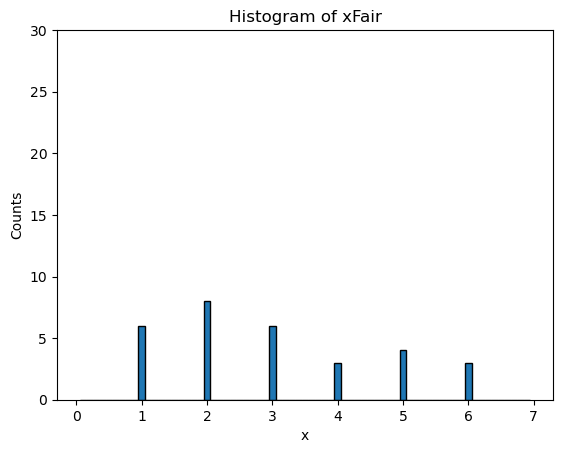

In [4]:
# Plot histogram:
plt.hist(xFair, bins=np.arange(0.05,7,.1),edgecolor='black')
plt.xlabel('x')
plt.ylabel('Counts')
plt.ylim([0,n])
plt.title('Histogram of xFair')
plt.show()

In [5]:
# Count the number of each outcome using the bincount function
counts = np.bincount(xFair)
print(counts)

[0 6 8 6 3 4 3]


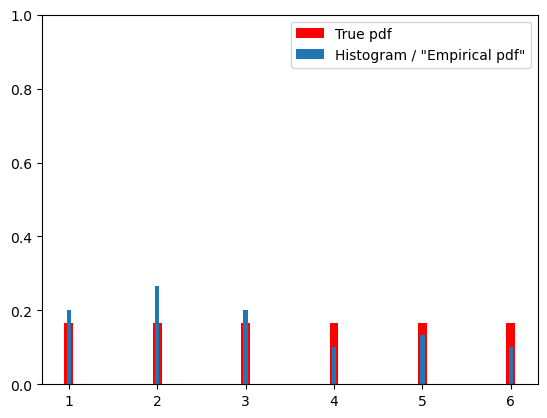

In [6]:
# Plot the true/theoretical pdf 
plt.bar(range(1,7), [1/6]*6, color='red', label='True pdf', width=0.1)

# add the empirical pdf (normalised histogram) to the plot
plt.bar(range(1,7), counts[1:7]/n, width=0.05, label='Histogram / "Empirical pdf"')

# add legend to the plot
plt.legend()

# set limits of y-axis 
plt.ylim([0,1])

# show the plot
plt.show()

### Example 3: Simmulate n rolls with an unfair dice

In [7]:
# Number of simulated realizations (sample size)
n = 30

# roll dice:
probs = [1/7, 1/7, 1/7, 1/7, 1/7, 2/7]
xUnFair = np.random.choice([1,2,3,4,5,6], size=n, replace=True, p=probs)
print(xUnFair)

[6 6 4 4 1 3 6 3 1 2 2 6 3 6 1 4 2 1 6 1 1 5 6 4 6 3 4 1 2 6]


In [8]:
# Count the number of each outcome using the bincount function
counts = np.bincount(xUnFair)
print(counts)

[0 7 4 4 5 1 9]


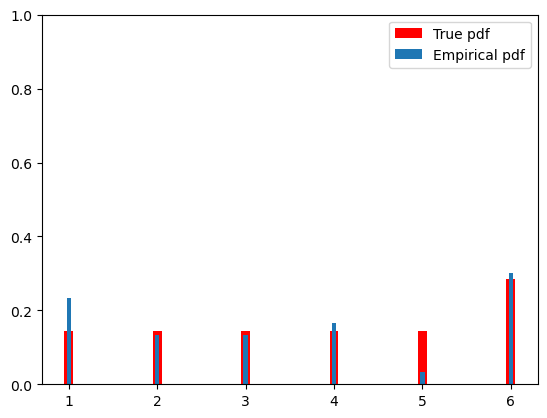

In [9]:
# Plot the true/theoretical pdf 
plt.bar(range(1,7), probs, color='red', label='True pdf', width=0.1)

# add the empirical pdf to the plot
plt.bar(range(1,7), counts[1:7]/n, width=0.05, label='Empirical pdf')


plt.legend()
plt.ylim([0,1])
plt.show()

### Example 4: ECDF

In [10]:
# Take the data from the unfair dice again
print(xUnFair)
print(counts)

[6 6 4 4 1 3 6 3 1 2 2 6 3 6 1 4 2 1 6 1 1 5 6 4 6 3 4 1 2 6]
[0 7 4 4 5 1 9]


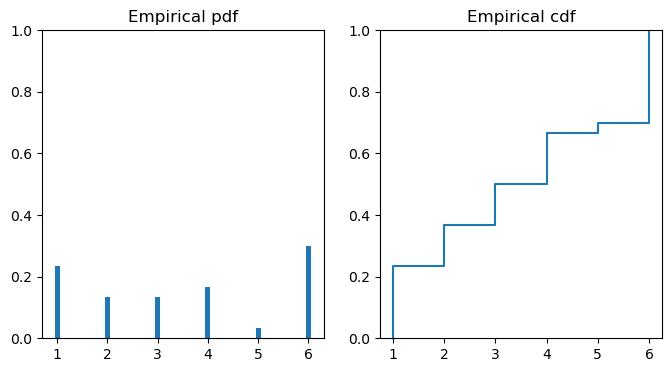

In [11]:
# Plot empirical pdf and cdf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.bar(range(1,7), counts[1:7]/n, label='True pdf', width=0.1)
ax1.set_ylim([0,1])
ax1.set_title('Empirical pdf')

ax2.ecdf(xUnFair)
ax2.set_ylim([0,1])
ax2.set_title('Empirical cdf')

plt.show()

### Example 5: The binomial distribution

In [12]:
# import scipy.stats for theoretical distributions (and much more)
import scipy.stats as stats

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# Probability of "success"
p = 0.1

# Number of repititions
nRepeat = 30

# Simulate Bernoulli experiment 'nRepeat' times
tmp = np.random.choice([0,1], p=[1-p, p], size=nRepeat, replace=True)
print(tmp)

In [ ]:
# Calculate number of successes
print(np.sum(tmp))

In [ ]:
# Or: use the binomial distribution simulation function
stats.binom.rvs(n=nRepeat, p=p) # "rvs" is random variates

have a look at documentation for binomial distribution in scipy.stats.binom:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

- .rvs<br>
- .pmf ("pdf" but for discrete distributions)<br>
- .cdf<br>
- .ppf<br>
<br>
and more..

### Example 6: Number of 6's with fair dice

In [ ]:
# 'nRepeat' independent draws from the set [1,2,3,4,5,6]
nRepeat = 30
xFair = np.random.choice([1,2,3,4,5,6], size=nRepeat, replace=True)
print(xFair)

# Count number of 6's:
print(np.sum(xFair == 6))

In [ ]:
# Or: use the binomial distribution simulation function
stats.binom.rvs(n=nRepeat, p=1/6)

In [ ]:
plt.bar(np.arange(0, nRepeat+1, 1), stats.binom.pmf(k=np.arange(0,nRepeat+1,1), n=nRepeat, p=1/6))
plt.show()

### Callcenter example

In [ ]:
# we can calculate the probability using the pdf ("pmf") of the binomial:
print(stats.binom.pmf(k=6, n=6, p=0.70))

In [ ]:
# lets plot entire pdf ("pmf"):
plt.bar(np.arange(0,7,1),stats.binom.pmf(k=np.arange(0,7,1), n=6, p=0.70))
plt.show()

### Harddrive example
Python (scipy.stats) uses different argument names than the book for the many parameters of the Hypergeometric distribution.

In the book we use `n` draws with `a` number of successes from a `N` size population. `(n,a,N)`. Whereas the corresponding Python (scipy.stats) arguments (parameters) would be `(N,n,M)` - so `N` for number of draws, `n` number of successes from a `M` size population.

Additionally, `k` correponds to `x` from the book.


In [ ]:
# we can calculate the probability using the pdf ("pmf") of the hypergoemetrical distribution:
print(1 - stats.hypergeom.pmf(k=0, M=10, n=2, N=3))

### Hospital admission example

In [ ]:
# we can calculate the probability using the pdf ("pmf") of the poisson distribution:
print(stats.poisson.pmf(k=0,mu=0.3)+stats.poisson.pmf(k=1,mu=0.3)+stats.poisson.pmf(k=2,mu=0.3))

In [ ]:
# or we can use the cumulative distribution function (cdf):
print(stats.poisson.cdf(k=2,mu=0.3))

### Example 7: Sample mean of n rolls with a fair dice

In [ ]:
# Number of simulated realizations (sample size)
n = 30

# n independent draws from the set (1,2,3,4,5,6) 
# with equal probability of each outcome
xFair = np.random.choice(range(1, 7), size=n, replace=True)
print(xFair)

# compute the sample mean:
print(xFair.mean())

Now change n to 1000 and try again (do not print xFair) - what happens?

### Example 8: Sample variance of n rolls with a fair dice 

In [ ]:
# Number of simulated realizations (sample size)
n = 30

# n independent draws from the set (1,2,3,4,5,6) 
# with equal probability of each outcome
xFair = np.random.choice(range(1, 7), size=n, replace=True)
print(xFair)

# compute the sample mean:
print(xFair.var(ddof=1))